In [1]:
import numpy as np
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt # type: ignore
import pymc3 as pm   # type: ignore

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [ ]:
 ### Exercise 1 (max 3 points)
#
# The file [mice.csv](./mice.csv) (source: https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression) contains the expression levels of 77 proteins/protein modifications that produced detectable signals in the nuclear fraction of cortex. 
# The eight classes of mice are described based on features such as genotype, behavior and treatment. According to genotype, mice can be control or trisomic. According to behavior, some mice have been stimulated to learn (context-shock) and others have not (shock-context) and in order to assess the effect of the drug memantine in recovering the ability to learn in trisomic mice, some mice have been injected with the drug and others have not.
#
# Load the data and print the unique values for the columns Genotype, Treatment, Behavior, and class.

# +
pass

In [6]:
df = pd.read_csv("mice.csv")
print(df['Genotype'].unique())
print(df['Treatment'].unique())
print(df['Behavior'].unique())
print(df['class'].unique())



['Control' 'Ts65Dn']
['Memantine' 'Saline']
['C/S' 'S/C']
['c-CS-m' 'c-SC-m' 'c-CS-s' 'c-SC-s' 't-CS-m' 't-SC-m' 't-CS-s' 't-SC-s']


In [10]:
unique_values = df[['Genotype', 'Treatment', 'Behavior', 'class']].nunique()
print(unique_values)


Genotype     2
Treatment    2
Behavior     2
class        8
dtype: int64


In [11]:
unique_values = df[['Genotype', 'Treatment', 'Behavior', 'class']].apply(lambda x: x.unique())
print(unique_values)


Genotype                                     [Control, Ts65Dn]
Treatment                                  [Memantine, Saline]
Behavior                                            [C/S, S/C]
class        [c-CS-m, c-SC-m, c-CS-s, c-SC-s, t-CS-m, t-SC-...
dtype: object


In [ ]:
# ### Exercise 2 (max 2 points)
#
# Plot a histogram of the "Bcatenin_N" values.
#

# +
pass
# -

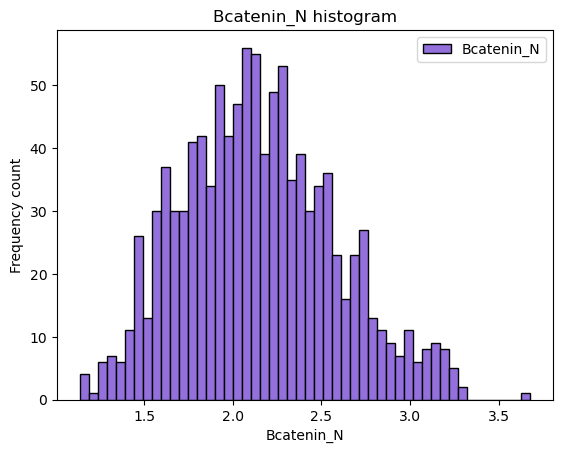

In [17]:
plt.hist(df['Bcatenin_N'], bins=50, color= 'mediumpurple', edgecolor='black', label='Bcatenin_N')
plt.legend()

plt.xlabel('Bcatenin_N')
plt.ylabel('Frequency count')
plt.title('Bcatenin_N histogram')
plt.show()

In [ ]:
 ### Exercise 3 (max 3 points)
#
# Make a figure with two columns of plots. In the first column plot together (contrast) the histograms of 'Bcatenin_N' for the two genotypes. In the second column plot together (contrast) the histograms of 'Bcatenin_N' for the two treatments. Use density histograms to make the diagrams easy to compare; add proper titles and legends.
#

# +
pass

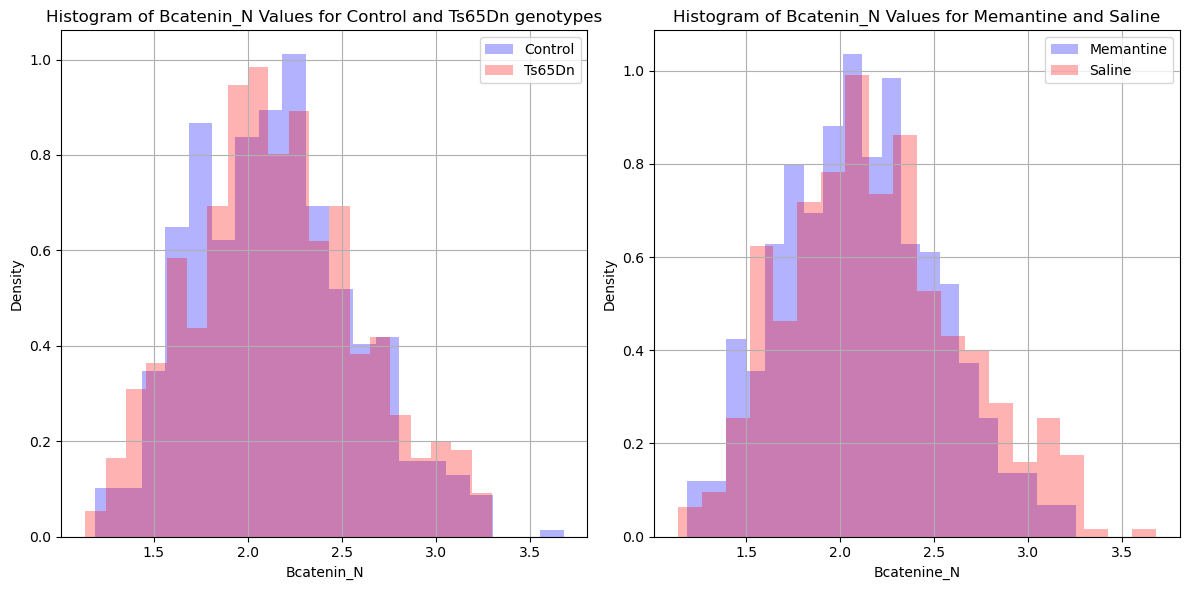

In [25]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# First column: histograms of Bcatenin_N for Control and Ts65Dn
df[df["Genotype"] == 'Control']["Bcatenin_N"].hist(bins=20, color="blue", alpha=0.3, density=True, ax=axs[0])
df[df["Genotype"] == 'Ts65Dn']["Bcatenin_N"].hist(bins=20, color="red", alpha=0.3, density=True, ax=axs[0])
axs[0].set_xlabel("Bcatenin_N")
axs[0].set_ylabel("Density")
axs[0].set_title("Histogram of Bcatenin_N Values for Control and Ts65Dn genotypes")
axs[0].legend(["Control", "Ts65Dn"])

# Second column: histograms of Bcatenin_N for Memantine and Saline
df[df["Treatment"] =='Memantine']["Bcatenin_N"].hist(bins=20, color="blue", alpha=0.3, density=True, ax=axs[1])
df[df["Treatment"] =='Saline']["Bcatenin_N"].hist(bins=20, color="red", alpha=0.3, density=True, ax=axs[1])
axs[1].set_xlabel("Bcatenine_N")
axs[1].set_ylabel("Density")
axs[1].set_title("Histogram of Bcatenin_N Values for Memantine and Saline")
axs[1].legend(["Memantine", "Saline"])

plt.tight_layout()
plt.show()

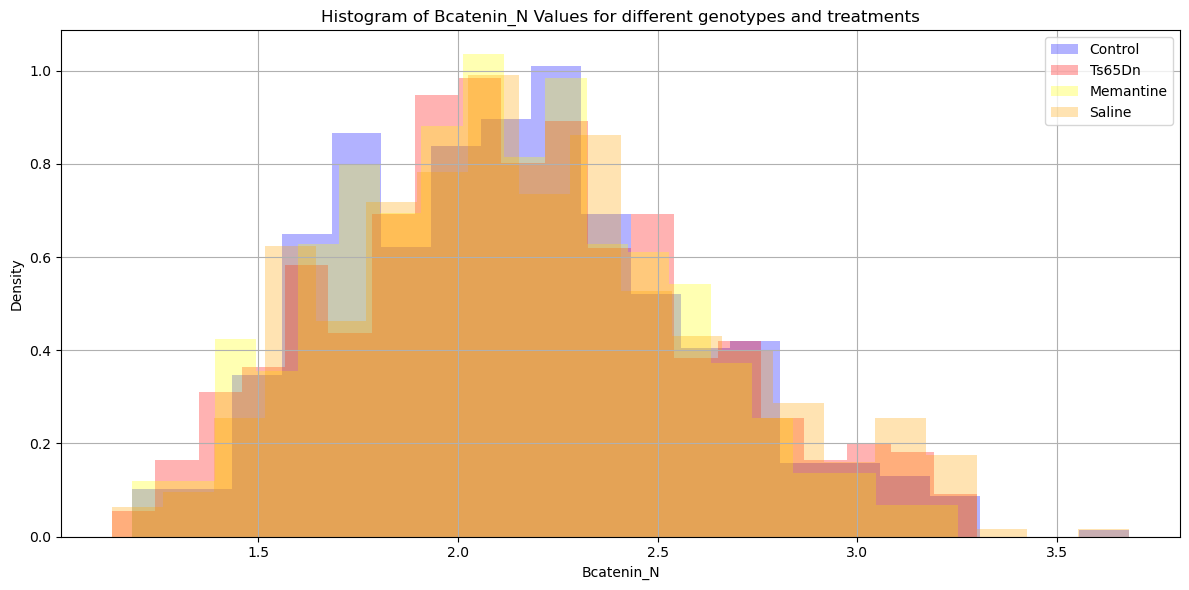

In [31]:
fig, axs = plt.subplots(1, figsize=(12, 6))

df[df["Genotype"] == 'Control']["Bcatenin_N"].hist(bins=20, color="blue", alpha=0.3, density=True)
df[df["Genotype"] == 'Ts65Dn']["Bcatenin_N"].hist(bins=20, color="red", alpha=0.3, density=True)

df[df["Treatment"] =='Memantine']["Bcatenin_N"].hist(bins=20, color="yellow", alpha=0.3, density=True)
df[df["Treatment"] =='Saline']["Bcatenin_N"].hist(bins=20, color="orange", alpha=0.3, density=True)
axs.set_xlabel("Bcatenin_N")

axs.set_ylabel("Density")
axs.set_title("Histogram of Bcatenin_N Values for different genotypes and treatments")
axs.legend(["Control", "Ts65Dn","Memantine", "Saline"])

plt.tight_layout()
plt.show()

In [62]:
df2=df.loc[:,['_N' in i for i in df.columns]]
#print (df2)


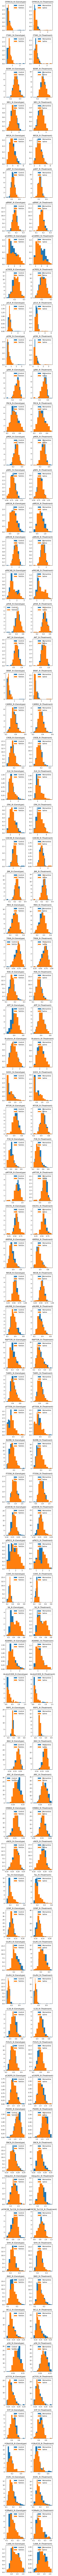

In [63]:
fig, ax = plt.subplots(ncols=2, nrows=77, figsize=(5, 3*77))


for j, col in enumerate([c for c in df.columns if c.endswith('_N')]):
    for i, f in enumerate(['Genotype', 'Treatment']):
        for g in df[f].unique():
            ax[j, i].hist(df[df[f] == g][col], density=True, label=g)
            ax[j, i].legend()
            ax[j, i].set_title(f'{col} ({f})')
_ = fig.tight_layout()


In [ ]:
# ### Exercise 4 (max 5 points)
#
# Make a (huge) figure with the histograms plotted in the previous exercise for all the proteins (there are 77 proteins columns, note that all ends with `'_N'`), each in a different row of the figure (the figure will have 2 columns and 77 rows; to make it readable set the `figsize` to `(5, 3*77)`). 
#

# +
pass

In [ ]:
# ### Exercise 5 (max 7 points)
#
# Define a function `mk_class` that takes three string parameters and returns a string composed by three parts joined by `-`: the first and the third part are the lowercase versions of, respectively, the first letter of the first or the third parameter, the second part is the second parameter with all non-alphabetic characters removed.
# For example, if the parameters are `'Mattia'`, `'s/he makes difficult exercises!'`, `'Professor'`, the return value should be `m-shemakesdifficultexercises-p`.
#
# To get the full marks, you should declare correctly the type hints and add a test within a doctest string.

# +
pass

In [ ]:
# ### Exercise 6 (max 5 points)
#
# The column `class` can be computed by combining the columns `Genotype`, `Behavior`, and `Treatment` with the same logic described in the previous exercise.
# Use the function `mk_class` to check that the class column of the data is in fact correct for all the rows.
#
# To get full marks, avoid the use of explicit loops.
#

# +
pass

In [ ]:
# ### Exercise 7 (max 4 points)
#
# Draw the scatterplots of the standardized values of `'Bcatenin_N'` vs. (also standardized) `'Tau_N'`. Make a different plot for each class. The standard value $z$ corresponding to a value $v$ taken from a series with mean $\bar v$ and standard deviation $\sigma$ is: $z = \frac{v - \bar v}{\sigma}$.

# +
pass
# -

In [ ]:
# ### Exercise 8 (max 4 points)
#
# Make a picture to compare the distribution of the values of `'Bcatenin_N'` with a Normal (Gaussian) distribution with mean $2.15$ and variance $0.4$.

# +
pass
# -
